In [1]:
import numpy as np
#if this fails, you need to put the case_studies.py file in the same folder
from case_studies import *

In [16]:
from scipy.optimize import minimize
import time

#These are the example optimizers you should evaluate this week.
#These ar eoptimizers implemented in scipy.
#they take as first 2 or 3 arguments the function f, its gradient df and sometimes its hessian Hf.
#the next parameters are all the same: x0 is the starting point, max_iterations the stopping criterion for iterations
#and epsilon the precision tolerance to be reached. 
#Note: epsilon is interpreted slightly differently across algorithms, and some algorithms might not reach the tolerance
#and stop early.
def scipy_bfgs(f,df,Hf,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    start_time=time.time()
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    result = minimize(logging_f, x0, method="BFGS", jac=df, tol=epsilon,options={'maxiter':max_iterations, 'gtol':epsilon})
    runtime = time.time() - start_time
    return np.array(xs), np.array(grad_norms), runtime, result.success

def scipy_newton(f,df,Hf,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    start_time=time.time()
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    result = minimize(logging_f, x0, method="Newton-CG", jac=df, hess=Hf, tol=epsilon,options={'maxiter':max_iterations,'xtol':epsilon})
    runtime = time.time() - start_time
    return np.array(xs), np.array(grad_norms), runtime, result.success

def scipy_trust_region(f,df,Hf,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    start_time=time.time()
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    result = minimize(logging_f, x0, method="trust-exact", jac=df, hess=Hf, tol=epsilon,options={'maxiter':max_iterations})
    runtime = time.time() - start_time
    return np.array(xs), np.array(grad_norms), runtime, result.success

Using matplotlib backend: module://matplotlib_inline.backend_inline
Optimizer: scipy_bfgs, Function: f4
Final solution point: [0.00190933 0.00190933]
Distance to optimum: 3.468166938038847e-13
Number of function evaluations: 14
Final function value: 1.22031947899206e-05
Final gradient norm: 2.9183616200786355e-12
Convergence success: True
Runtime: 0.008001 seconds

Optimizer: scipy_newton, Function: f4
Final solution point: [0.00190933 0.00190933]
Distance to optimum: 1.1857525003118021e-11
Number of function evaluations: 8
Final function value: 1.2203194789920608e-05
Final gradient norm: 9.977762840817625e-11
Convergence success: True
Runtime: 0.002719 seconds

Optimizer: scipy_trust_region, Function: f4
Final solution point: [0.00190933 0.00190933]
Distance to optimum: 1.1857524696459338e-11
Number of function evaluations: 9
Final function value: 1.2203194789920598e-05
Final gradient norm: 9.977761920841575e-11
Convergence success: True
Runtime: 0.002916 seconds



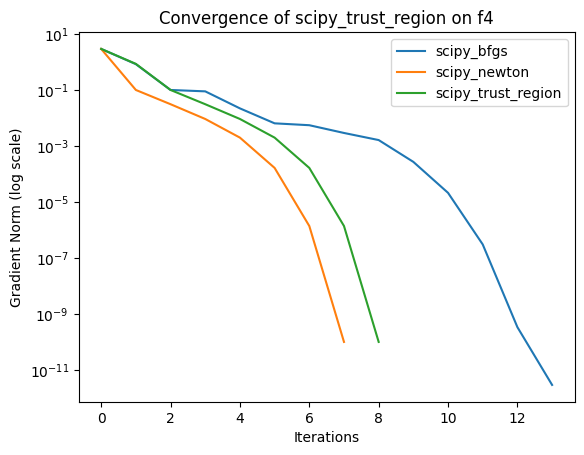

In [18]:
%matplotlib 

import matplotlib.pyplot as plt

def evaluate_optimizer(optimizer, f, df, Hf, x0, max_iterations, epsilon, function_name):
    xs, grad_norms, runtime, success = optimizer(f, df, Hf, x0, max_iterations, epsilon)
    optimal = x_opt(function_name, len(x0))  # get the optimized point
    final_x = xs[-1]
    final_value = f(final_x)
    final_gradient_norm = grad_norms[-1]
    distance_to_optimum = np.linalg.norm(final_x - optimal)

    print(f"Optimizer: {optimizer.__name__}, Function: {function_name}")
    print(f"Final solution point: {final_x}")
    print(f"Distance to optimum: {distance_to_optimum}")
    print(f"Number of function evaluations: {len(grad_norms)}")
    print(f"Final function value: {final_value}")
    print(f"Final gradient norm: {final_gradient_norm}")
    print(f"Convergence success: {success}")
    print(f"Runtime: {runtime:.6f} seconds\n")

    # plot the process of reaching tolerance
    plt.plot(grad_norms, label=optimizer.__name__)
    plt.yscale('log')  # in log -- TODO explain
    plt.xlabel("Iterations")
    plt.ylabel("Gradient Norm (log scale)")
    plt.title(f"Convergence of {optimizer.__name__} on {function_name}")
    plt.legend()


x0 = np.ones(2)
max_iterations = 1000
epsilon = 1.e-10
evaluate_optimizer(scipy_bfgs, f4, df4, Hf4, x0, max_iterations, epsilon, "f4")
evaluate_optimizer(scipy_newton, f4, df4, Hf4, x0, max_iterations, epsilon, "f4")
evaluate_optimizer(scipy_trust_region, f4, df4, Hf4, x0, max_iterations, epsilon, "f4")


In [ ]:
#example usage of the algorithms
#the output is a list of points evaluated on the function as well as the gradient norms at that point
#this algorithms has the first three arguments functions for function value, gradient and Hessian.
#For the 5 functions, those are named f1-f5 etc and can be found in the case_studies.py file

# x0=np.ones(2)
# xs,grad_norms = scipy_trust_region(f4,df4,Hf4,x0, 1000, 1.e-10)
#the optimal point for a given function and dimensionality is stored in the package as well for at least 15 decimals precision
# optimal = x_opt("f4", 2)
# print("final solution point:", xs[-1])
# print("distance of x from optimum", np.linalg.norm(xs[-1]-optimal))
# print("number of function evaluations:", len(grad_norms))
# print("final function value:", f4(xs[-1]))
# print("final gradient norm:", grad_norms[-1])